#### K-Means Algorithm
Randomly initialize K cluster centroids u1, u2, ..., uk (K < m, randomly pick k training examples)
Repeat {
     # Assign points to cluster centroids
     for i = 1 to m
       c(i) := index(from 1 to K) of cluster centroid closest to x(i) - mink || x(i) - u(k) ||2
     
     #Move cluster centroids
     for k = 1 to K
          u(k) := average of points assigned to cluster k
}

#### K-Means Optimization Objective
c(i) = index of cluster (1,2,...,K) to which example x(i) is currently assigned
u(k) = cluster centroid k
uc(i) = cluster centroid of cluster to which example x(i) has been assigned
Cost Function (Distortion):
     J(c1, c2, ...., cm, u1, u2, ...., uk) = 1/m || x(i) - uc(i) ||2
     
#### Choosing value of K
+ Elbow method
+ Silhouette Coefficient = avg(s) where s = b - a / max(a,b) := must be as close to 1
+ Gap statistic

### Outline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

# 1 - Implementing K-means
The K-means algorithm is a method to automatically cluster similar data points together.

Concretely, you are given a training set , and you want to group the data into a few cohesive “clusters”.
K-means is an iterative procedure that
Starts by guessing the initial centroids, and then
Refines this guess by
Repeatedly assigning examples to their closest centroids, and then
Recomputing the centroids based on the assignments.
In pseudocode, the K-means algorithm is as follows:

##### Initialize centroids
##### K is the number of clusters
  centroids = kMeans_init_centroids(X, K)

  for iter in range(iterations):
      # Cluster assignment step: 
      # Assign each data point to the closest centroid. 
      # idx[i] corresponds to the index of the centroid 
      # assigned to example i
      idx = find_closest_centroids(X, centroids)

      # Move centroid step: 
      # Compute means based on centroid assignments
      centroids = compute_means(X, idx, K)
The inner-loop of the algorithm repeatedly carries out two steps:
(i) Assigning each training example  to its closest centroid, and
(ii) Recomputing the mean of each centroid using the points assigned to it.
The -means algorithm will always converge to some final set of means for the centroids.

However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.

Therefore, in practice the K-means algorithm is usually run a few times with different random initializations.
One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).
You will implement the two phases of the K-means algorithm separately in the next sections.

You will start by completing find_closest_centroid and then proceed to complete compute_centroids.


In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] =  distance.index(min(distance))
    
    return idx

In [4]:
X = np.load('./Data/ex7_X.npy')
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


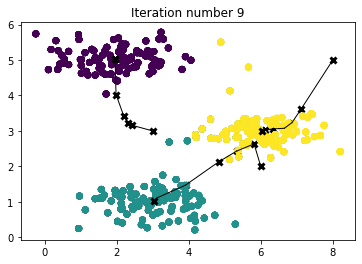

In [9]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

#### 4- Image compression with K-means
In this exercise, you will apply K-means to image compression.

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
By making this reduction, it is possible to represent (compress) the photo in an efficient way.
Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).
In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

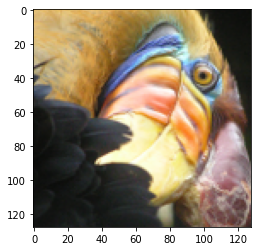

In [27]:
original_img = plt.imread('./Data/bird_small.png')
plt.imshow(original_img)

In [28]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [29]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
print(X_img.shape)

(16384, 3)


In [30]:
X_img[:5]

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       [0.00342945, 0.00284506, 0.00161476],
       [0.00346021, 0.00275279, 0.00158401]], dtype=float32)

In [31]:
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (16384,)
Closest centroid for the first five elements: [9 9 9 9 9]


In [32]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

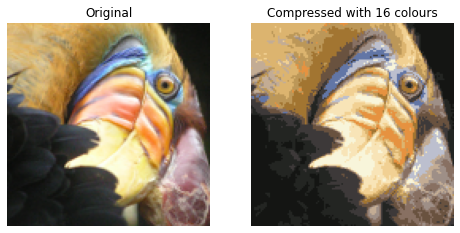

In [33]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

#### MNIST

In [11]:
from sklearn.datasets import load_digits

In [12]:
X, y = load_digits(return_X_y=True)
print(f"X shape : {X.shape}, y shape: {y.shape}")

X shape : (1797, 64), y shape: (1797,)


In [14]:
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

#### PCA

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio=ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.4006046  0.31828396 0.28111144]


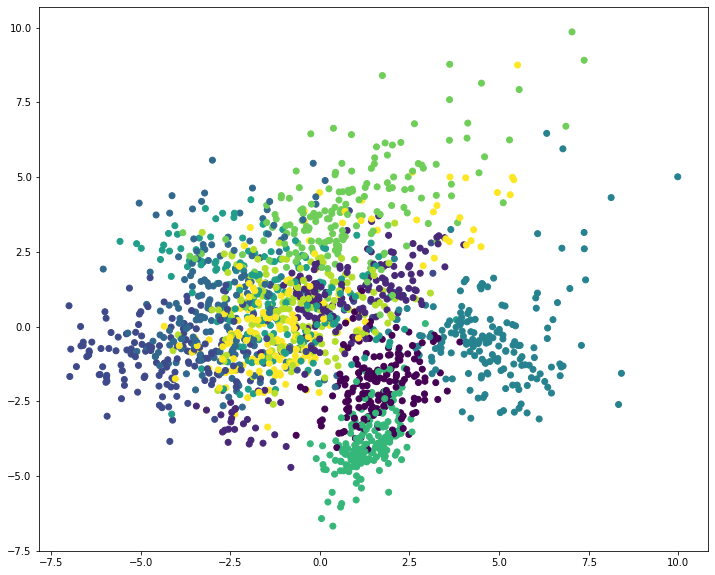

In [16]:
plt.figure(figsize = (12,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

#### TSNE

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
palette = sns.color_palette("bright", 10)

C:\Users\212585738\Miniconda3\envs\kaggle\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\212585738\Miniconda3\envs\kaggle\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\212585738\Miniconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

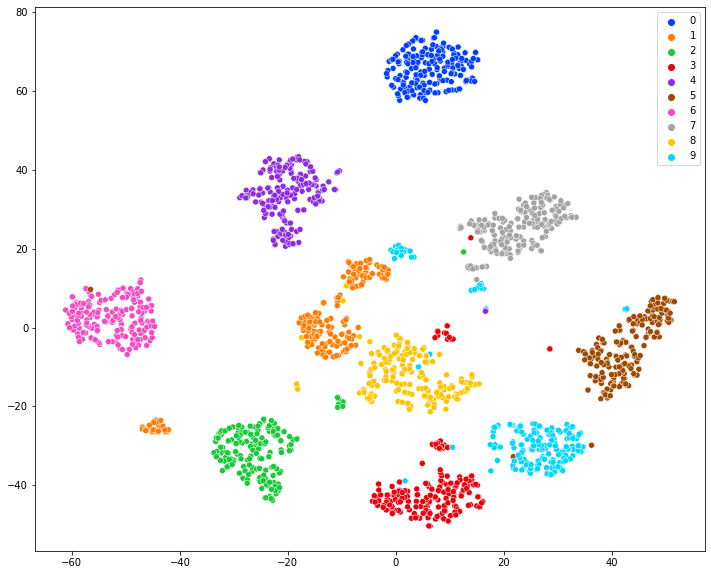

In [18]:
plt.figure(figsize=(12,10))
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

#### K-Means on MNIST

In [21]:
K = 10
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X, initial_centroids, max_iters)
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (1797,)
Closest centroid for the first five elements: [6 1 1 7 0]


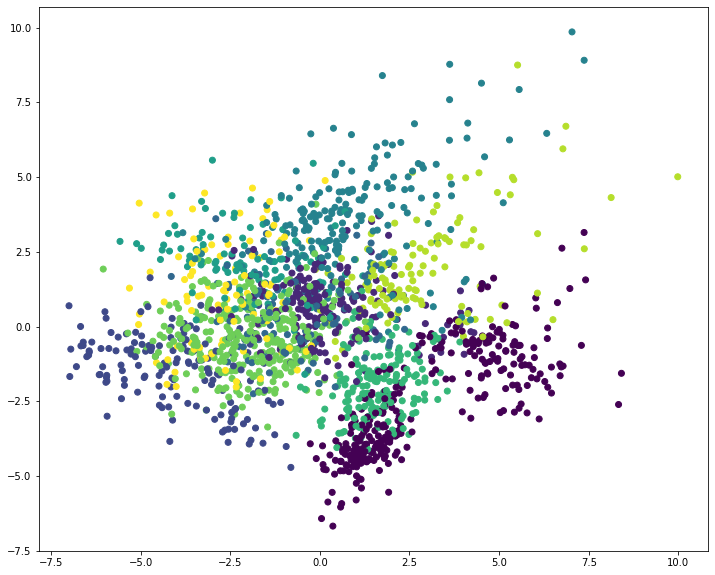

In [23]:
plt.figure(figsize = (12,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=idx)

C:\Users\212585738\Miniconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

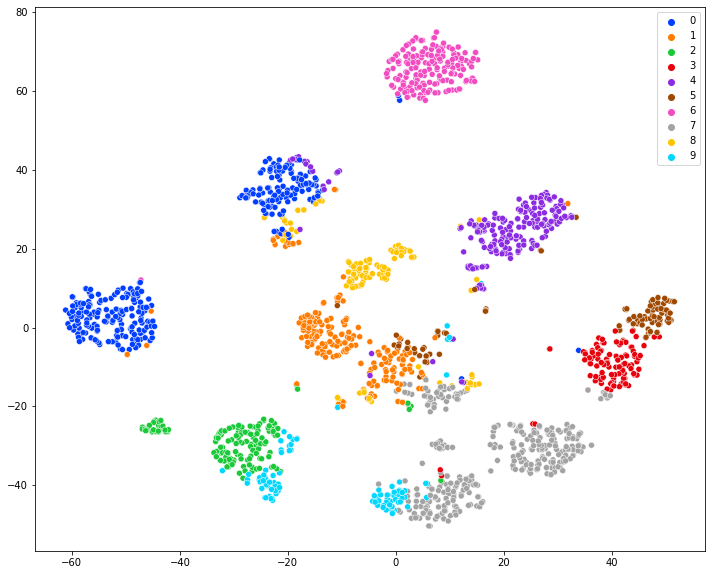

In [25]:
plt.figure(figsize=(12,10))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=idx, legend='full', palette=palette)

330